### Importation des bibliothéques :

In [6]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

### Chargement et Analyse de  l'image :

#### Charger l'image :

In [ ]:
my_image = cv2.imread("solo_convert.png")
my_image_rgb = cv2.cvtColor(my_image,cv2.COLOR_BGR2RGB) # Conversion en RGB car opencv charge en BGR

#### Afficher les dimension de l'image:

In [4]:
height,width,channels = my_image.shape # Extraire les dimensions de notre image.
print(f"L'image est de dimension : {width} x {height}, nombre de canaux : {channels}")

L'image est de dimension : 860 x 484, nombre de canaux : 3


#### Affichage de l'image :

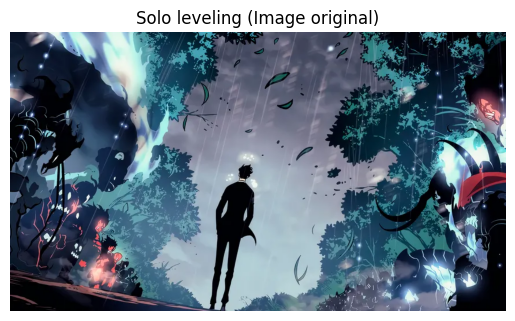

In [5]:
plt.imshow(my_image_rgb)
plt.title("Solo leveling (Image original)")
plt.axis("off")
plt.show()

### Prétraitement de l'image :

- Comme on utilise YOLOv8 on a pas besoin de faire un prétraitement car il se charge lui meme de redimensionnement et de la normalisation automatique 

#### Chargement du modéle:

In [7]:
model = YOLO("yolov8n")

100%|██████████| 6.25M/6.25M [00:00<00:00, 7.59MB/s]


#### Inférence et detection d'objets:

In [14]:
results = model("solo_convert.png")

boxes = results[0].boxes # Boite, score et classes
for box in boxes:
    x1,y1,x2,y2 = box.xyxy[0] # coordonnées boite englobante
    
    confidence = box.conf[0].item() # Score de confiance 
    
    classes = int(box.cls[0].item()) # classe prédite
    
    classe_name = model.names[classes] # Nom de la classe
    
    print(f"Objet détecter : {classe_name}")
    print(f"Confiance: {confidence:.2f}")
    print(f"Boite anglobante: ({x1:.0f},{y1:.0f}) a ({x2:.0f},{y2:.0f})")



image 1/1 /Users/aminechabane/Desktop/projet_image/solo_convert.png: 384x640 2 persons, 1 motorcycle, 49.5ms
Speed: 2.0ms preprocess, 49.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
Objet détecter : person
Confiance: 0.85
Boite anglobante: (344,230) a (429,483)
Objet détecter : motorcycle
Confiance: 0.39
Boite anglobante: (730,144) a (859,475)
Objet détecter : person
Confiance: 0.33
Boite anglobante: (726,96) a (859,467)


#### Filtrage des r&sultat :

In [15]:
seuil_confiance = 0.5
detection = results[0]
filtred_box = []

for box in detection.boxes:
    if box.conf.item() > seuil_confiance:
        filtred_box.append(box)
        
print(f"{len(filtred_box)} objets detecter avec un seuil de confiance sup a {seuil_confiance}")

1 objets detecter avec un seuil de confiance sup a 0.5


#### Visualisation des résultats : 

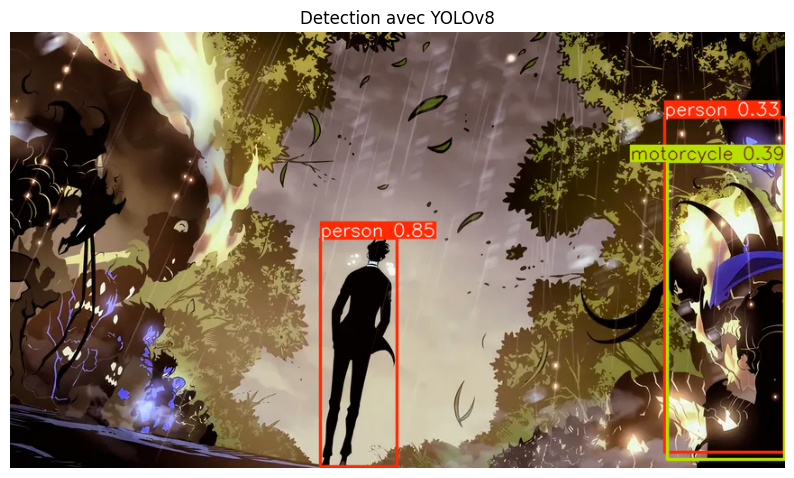

True

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(results[0].plot())
plt.title("Detection avec YOLOv8")
plt.axis("off")
plt.show()

cv2.imwrite("resultat.jpg",results[0].plot())